In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import peak_widths, find_peaks
import warnings
import os
import sys
warnings.filterwarnings('ignore')

# Задание 1
Определение оптимального угла поворота кристалла второй гармоники.
Для определения оптимального угла поворота кристалла второй гармоники снимается зависимость I2ω(θ). Необходимо построить график зависимости, определить угол синхронизма и его ширину. Погрешность определения интенсивности второй гармоники определяется шумами фотоприемника и составляет ±0.8 мВ.

In [2]:
#Сила тока, приходящая на осциллограф от фотоприемника в мВ
I_2w = np.array([4, 5, 8, 9, 10.1, 10.8, 13, 14.8, 15, 15.2, 14, 14, 15, 15, 14, 9, 6])
theta = np.array([100, 110, 120, 130, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 170, 180])
#Погрешность измерения I_2w в мВ
error = 0.8

Очевидно, что при фазовом синхронизме энергия второй гармоники максимальна, поэтому неайдем угол, при котором достигается максимум I_2w 

Построим график I_2w

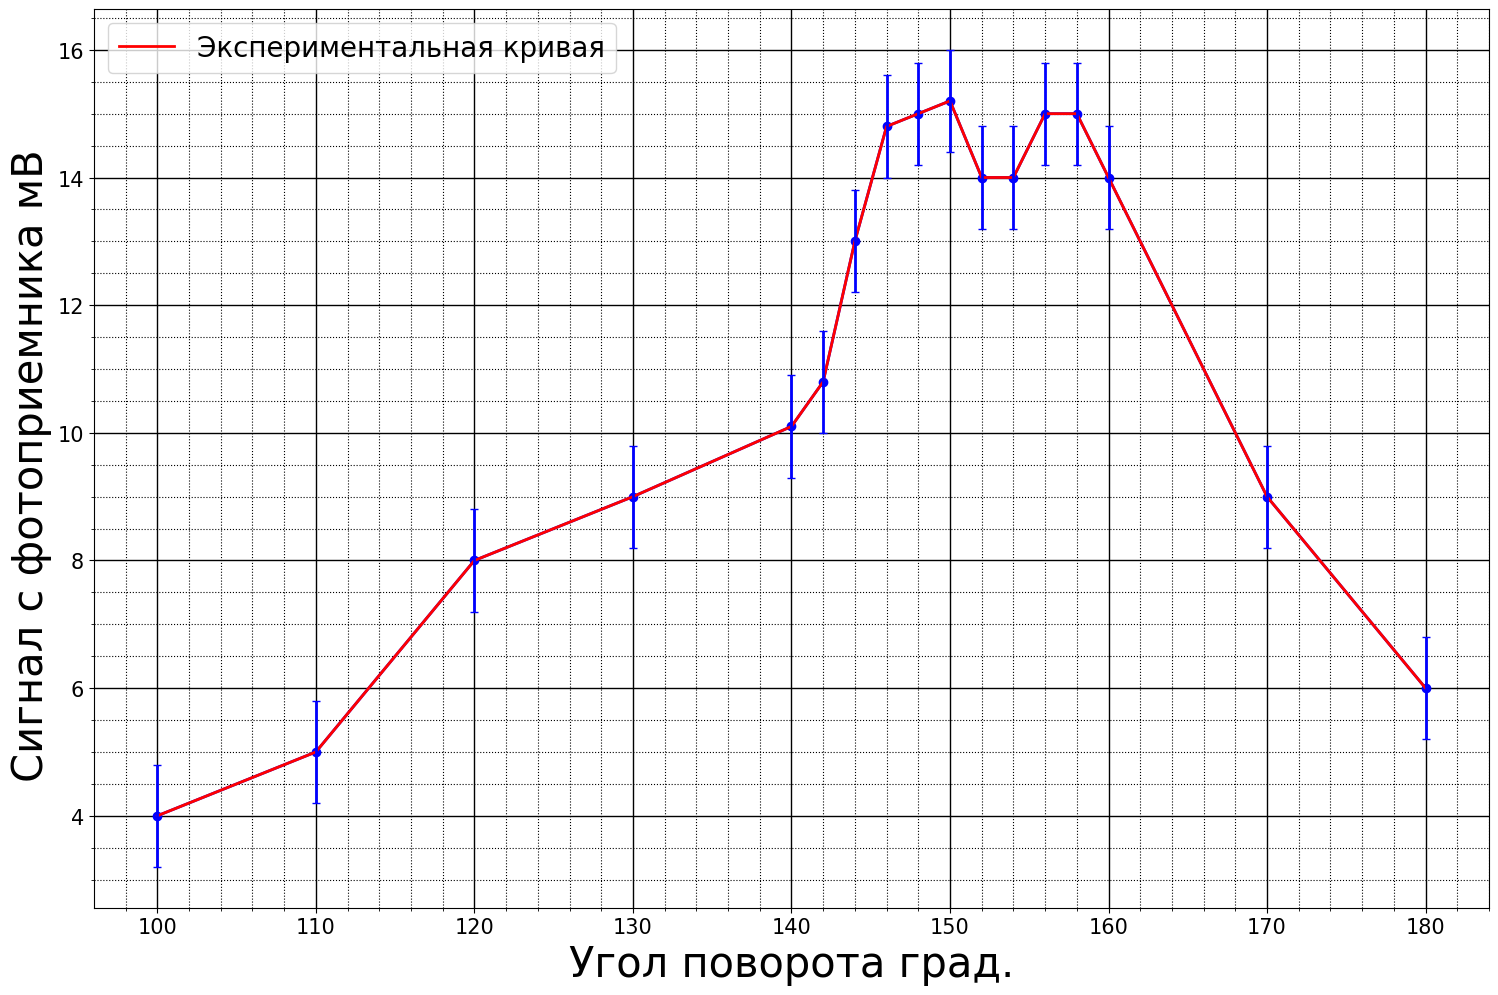

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(theta,  I_2w, c = 'r',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Угол поворота град.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал с фотоприемника мВ ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
ax.errorbar(
            theta,  I_2w,  yerr=error,  
            c = 'blue', ecolor = "blue", 
            fmt='-o',barsabove=True,
            ms=6, capsize = 3,
            linewidth=width) 
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'exp_curve.png'))

Ширина синхронизма берется как ширина на полувысоте. Обычно она составляет(в статьях) порядка 40 угловых минут, но это только для коллимированных пучков, а у нас он расходящийся.

Для этого аппроксимируем кривую гауссом и уже у него определим ширину на полувысоте, которая и будет шириной синхронизма, а максимум даст угол синхронизма 

In [4]:
#Увеличим шаг между 

In [5]:
[a,b,c],cov = curve_fit(lambda x, a, b, c: c*np.exp(-(x-a)**2/(2*b**2)), 
                        theta, I_2w, 
                        maxfev=100000, 
                        p0=[146, 40, 14],
                        bounds=([130., 10., 0], [170., 100., 50]))
error_a, error_b, error_c = np.sqrt(np.diag(cov))
# P0 - начальные значения, с которых начинается поиск 
# bounds - границы, в пределах которых будут искаться параметры 

In [6]:
#Увеличим шаг между и посчитаем аппроксимирующую кривую
#интервал для гауса необходимо расширить, чтобы влезала линия полувысоты 
#add_theta - подстраиваемый параметр
add_theta_p = 50
add_theta_m = 50
theta_2 = np.linspace(np.min(theta) - add_theta_m, np.max(theta)+add_theta_p, 5000 )
I_2w_approx = c*np.exp(-(theta_2-a)**2/(2*b**2))

#Полуширина гаусса равна 
half_width = 2*np.sqrt(2*np.log(2))*b

# Индекс центра гаусса 
c_idx = np.argmin(abs(theta_2 - a))

print(I_2w_approx[c_idx])
#определим левую и правую границу линии полувысоты 
_, half_level, lb_half_level_idx, rb_half_level_idx = peak_widths(I_2w_approx, [c_idx], rel_height=0.5 )
lb_half_level_idx = np.round(lb_half_level_idx).astype('int')
rb_half_level_idx = np.round(lb_half_level_idx).astype('int')
lb_half_level = theta_2[lb_half_level_idx] 
rb_half_level = theta_2[rb_half_level_idx]


13.99796139873556


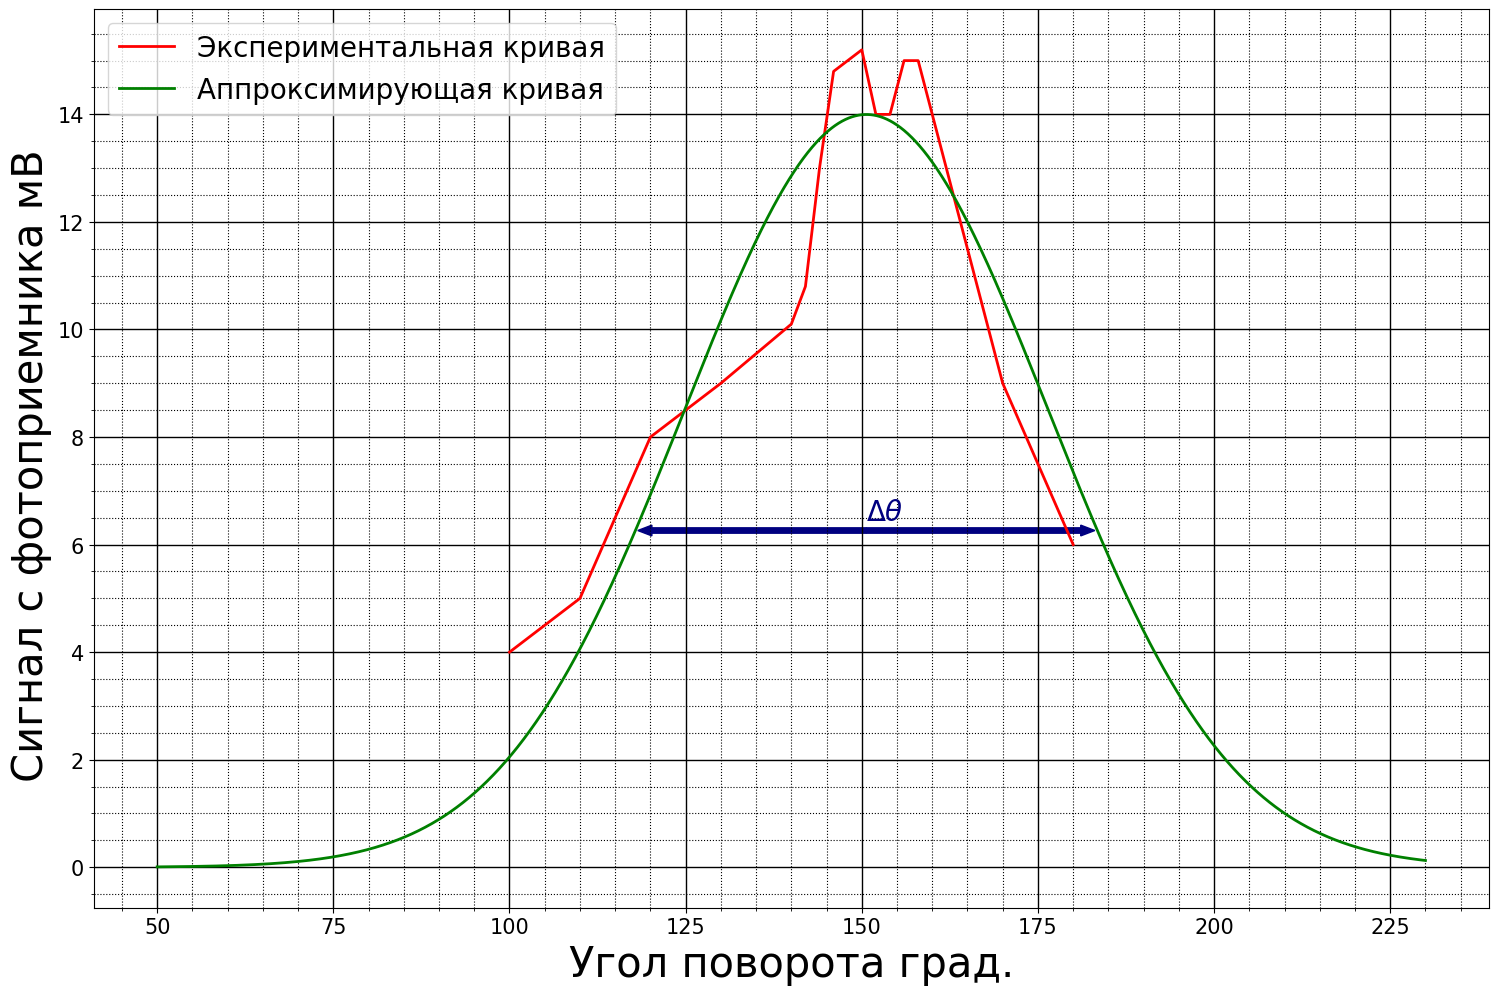

In [7]:

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(theta,  I_2w, c='r',linewidth=width, label="Экспериментальная кривая") 
ax.plot(theta_2, I_2w_approx , c='g', linewidth=width, label="Аппроксимирующая кривая") 
# ax.errorbar(
#             theta,  I_2w,  yerr=error,  
#             c = 'blue', ecolor = "blue", 
#             fmt='-o',barsabove=True,
#             ms=6, capsize = 3,
#             linewidth=width) 
ax.set_xlabel('Угол поворота град.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал с фотоприемника мВ ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.legend(fontsize=20, loc='upper left')
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':' )

#Необходимо вручную подстроить параметры стрелки (толщина, длина конца стрелки, его толщина)  и чуть-чуть опустить 
# с поможью константы adj
adj = -0.8
ax.arrow(theta_2[c_idx], half_level+adj, -half_width/2, 0, width=0.1, head_width=0.2, head_length=2, color='navy')
ax.arrow(theta_2[c_idx], half_level+adj, +half_width/2, 0,width=0.1, head_width=0.2, head_length=2, color='navy')
adj_1 = adj + 0.2
ax.text(theta_2[c_idx], half_level+adj_1, "$Δθ$",fontsize = 20, color='navy')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'app_curve.png'))

$\Delta\theta$- ширина гаусса на полувысоте, ее погрешность связана с известной погрешностью параметра, $b$ а аппроксимирующей кривой по формуле:  

$\Delta(\Delta\theta) = 2\cdot\sqrt{2\ln{2}}\cdot\Delta b $

А погрешность $\theta$ - угла синхронизма, погрешностью  параметра $a$ 

In [8]:
delta_theta = half_width
theta = a

In [9]:
error_delta_theta = error_b*2*np.sqrt(2*np.log(2))
error_theta = error_a

In [10]:
print("Угол синхронизма равен θ = ", theta,)
print("Абсолютная погрешность θ = ",error_theta)
print("Ширина угла синхронизации Δθ = ", delta_theta)
print("Абсолютная погрешность Δθ = ", error_delta_theta)

Угол синхронизма равен θ =  150.65436182041964
Абсолютная погрешность θ =  1.98406329643473
Ширина угла синхронизации Δθ =  60.86343847307142
Абсолютная погрешность Δθ =  5.180359719228617


# Задание 2
Определение оптимальной температуры кристалла второй гармоники.
Для определения оптимальной температуры кристалла второй гармоники снимается зависимость I2ω (t0С) при выставленном оптимальном угле поворота кристалла. Температура кристалла управляется с помощью элемента Пельтье. Необходимо построить график зависимости, определить оптимальную температуру кристалла. Погрешность определения интенсивности второй гармоники аналогична заданию 1.

In [11]:
#Сигнал с фотоприёмника в мВ
I_2w = np.array([5.9, 6, 7.9, 10.1, 11.7, 12.6, 13.4, 13.9, 15.2, 15.0, 13.9])
#Температура кристалла в градусах Цельсия
tem = np.array([15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35])
#Погрешность сигнала в мВ
error = 0.8

Найдём температуру, при которой интенсивность(сигнал) максимальна 

In [12]:
# При отсутствии максимумов необходимо ввести параметр prominence и понижать его,
# пока на графике не появится  один пик
peaks_idx, prop = find_peaks(I_2w)
print(peaks_idx)

[8]


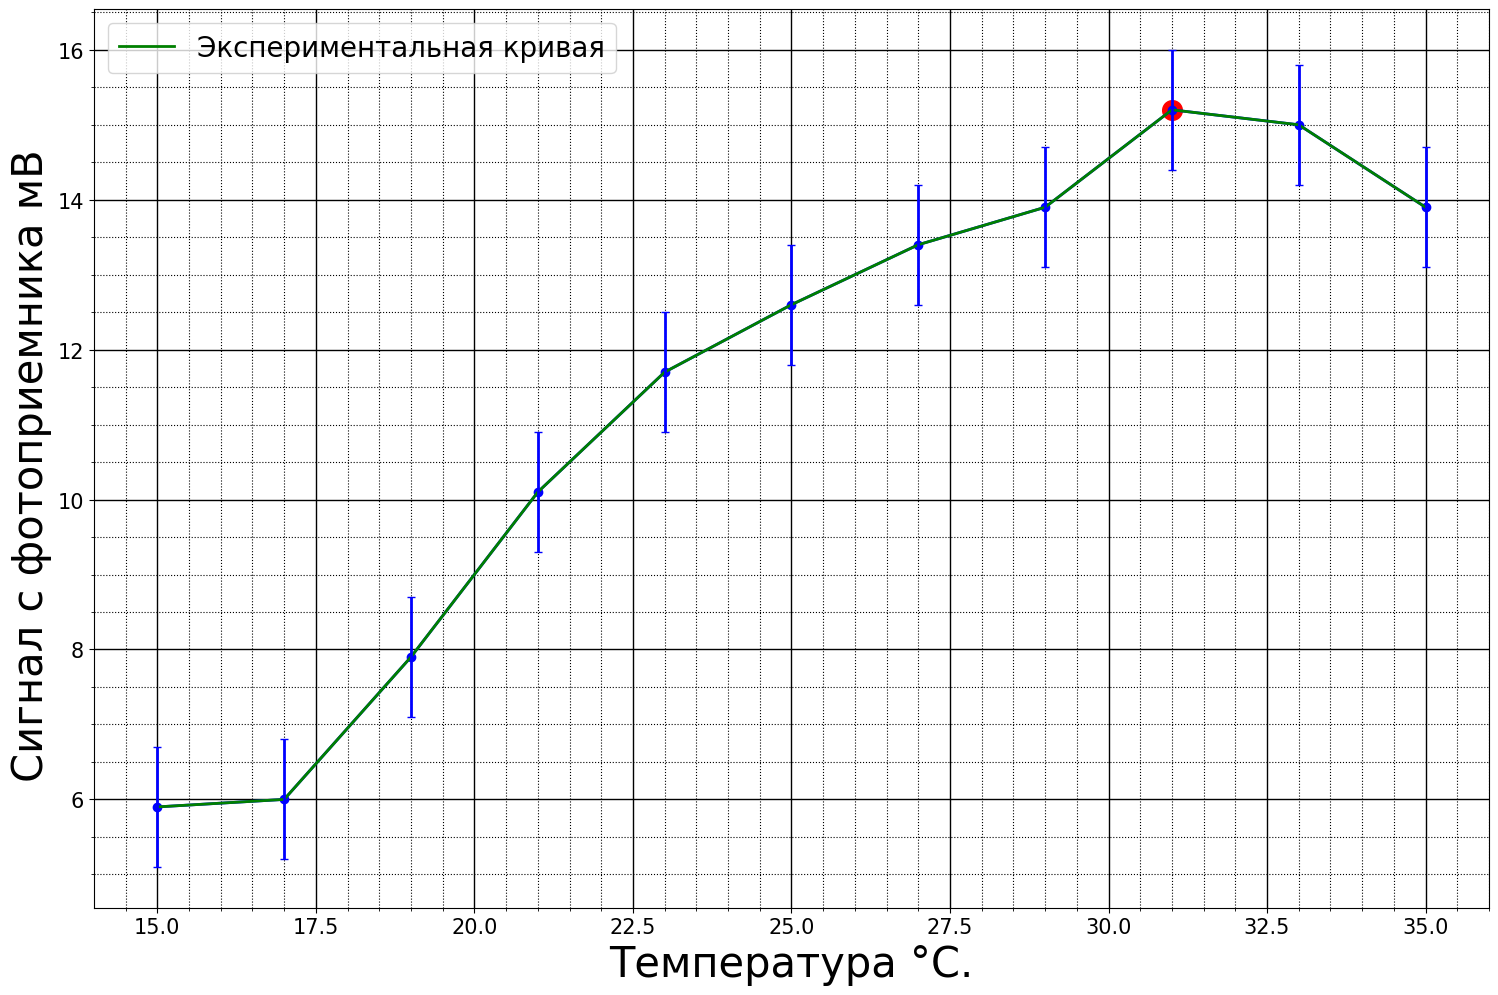

In [13]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(tem,  I_2w, c = 'g',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Температура °C.',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Сигнал с фотоприемника мВ ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
ax.errorbar(
            tem,  I_2w,  yerr=error,  
            c = 'blue', ecolor = "blue", 
            fmt='-o',barsabove=True,
            ms=6, capsize = 3,
            linewidth=width)
ax.scatter( tem[peaks_idx],
            I_2w[peaks_idx],
            color="red", s=200, marker='o' 
            )
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'exp_curve_t.png'))

In [14]:
print("Оптимальная температура = ", tem[peaks_idx])
print("Абсолютная погрешность температуры - последняя  цифре на приборе = 1" )

Оптимальная температура =  [31]
Абсолютная погрешность температуры - последняя  цифре на приборе = 1


# Задание 3
Определение КПД преобразования излучения во вторую гармонику. 
Для определения КПД преобразования излучения во вторую гармонику снимаются зависимости I2ω(Iнак) и Iω(Iнак), где Iнак – ток накачки лазера накачки.

Для оценки зависимости эффективности преобразования во вторую гармонику необходимо построить графики зависимости I2ω(Iω) и I2ω/Iω(Iнак). Необходимо определить характер зависимостей и описать соответствие зависимостей теоретическим оценкам.

In [15]:
#Сигналы с фотоприёмника первой и второй гармоник в мВ
I_2w = np.array([0.2, 0.42, 0.9, 1.3, 1.8, 2.29, 2.32, 3.3, 4.3, 5.7, 7.0, 8.0, 9.3, 10.4, 12.1, 12.9])
I_w = np.array([54, 72, 92, 126, 150, 180, 200, 240, 294, 318, 359, 400, 440, 463, 477, 505])
#Ток накачки мА
I_pump = np.array([0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7])
#Абсолютная погрешность сигнала с осциллографа
error_I = 0.8
#Погрешность тока накачки в мА
error_I_pump = 0.01

In [16]:
# отношение сигналов 
I_ratio = I_2w/I_w 
# Погрешность отношения 
error_ratio = I_ratio*np.sqrt((error_I /I_2w )**2 + (error /I_w )**2)

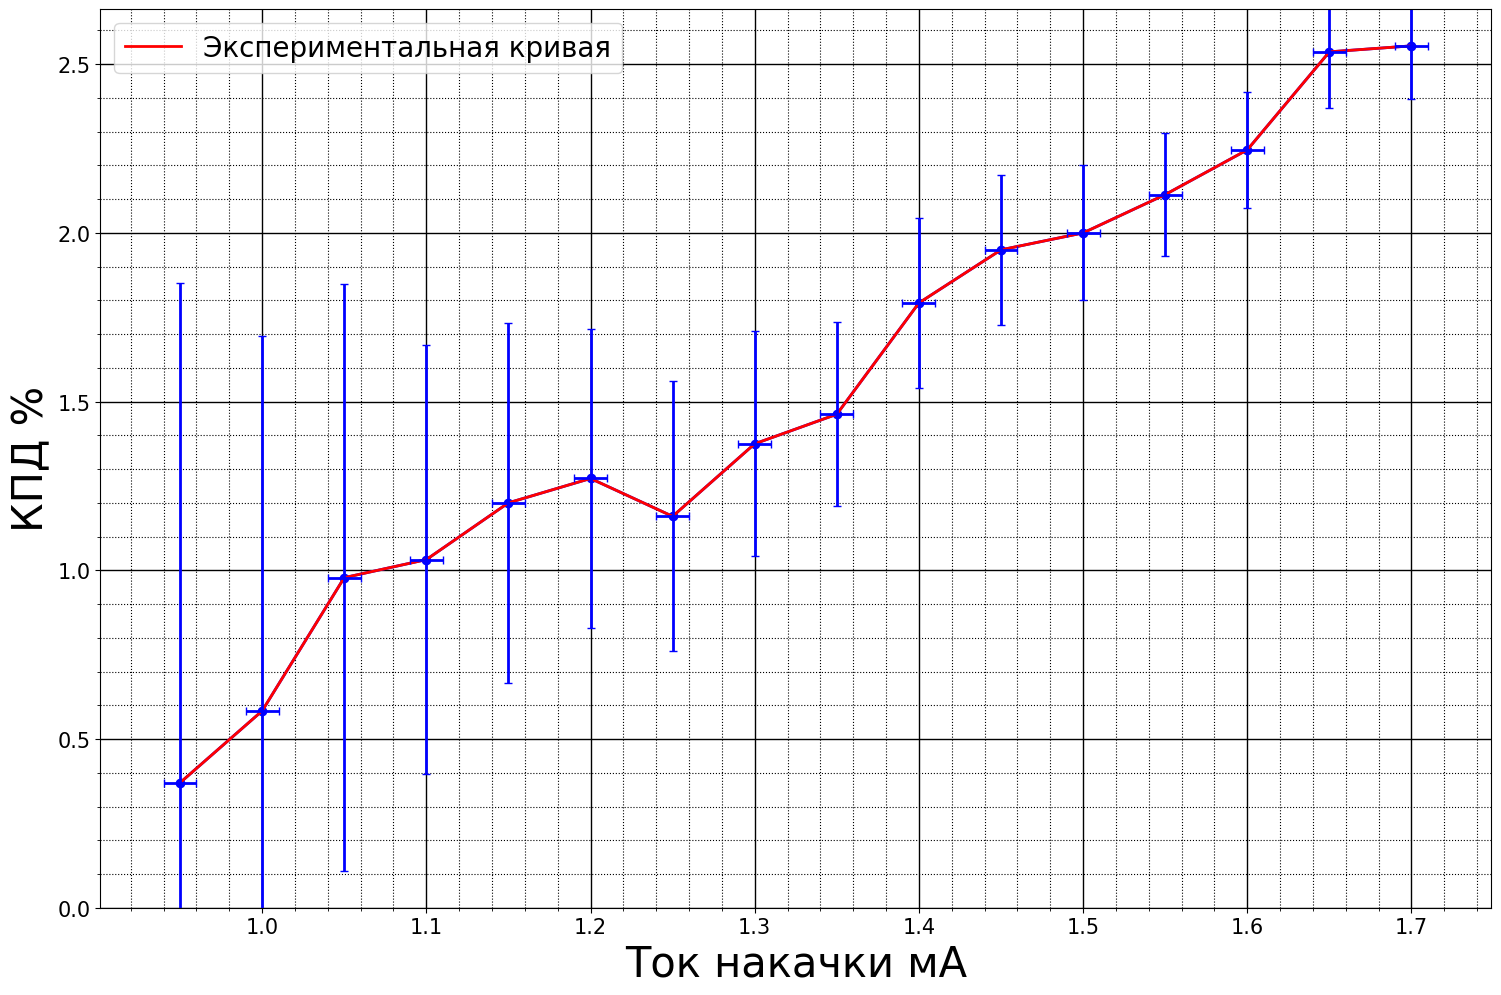

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(I_pump,  I_ratio * 100, c = 'r',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Ток накачки мА',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("КПД %",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
ax.set_ylim(0)
ax.errorbar(
            I_pump, I_ratio *100, xerr=error_I_pump*np.ones(len(I_ratio)),  yerr=error_ratio*100,  
            c = 'blue', ecolor = "blue", 
            fmt='-o',barsabove=True,
            ms=6, capsize = 3,
            linewidth=width)

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'exp_curve_ratio.png'))

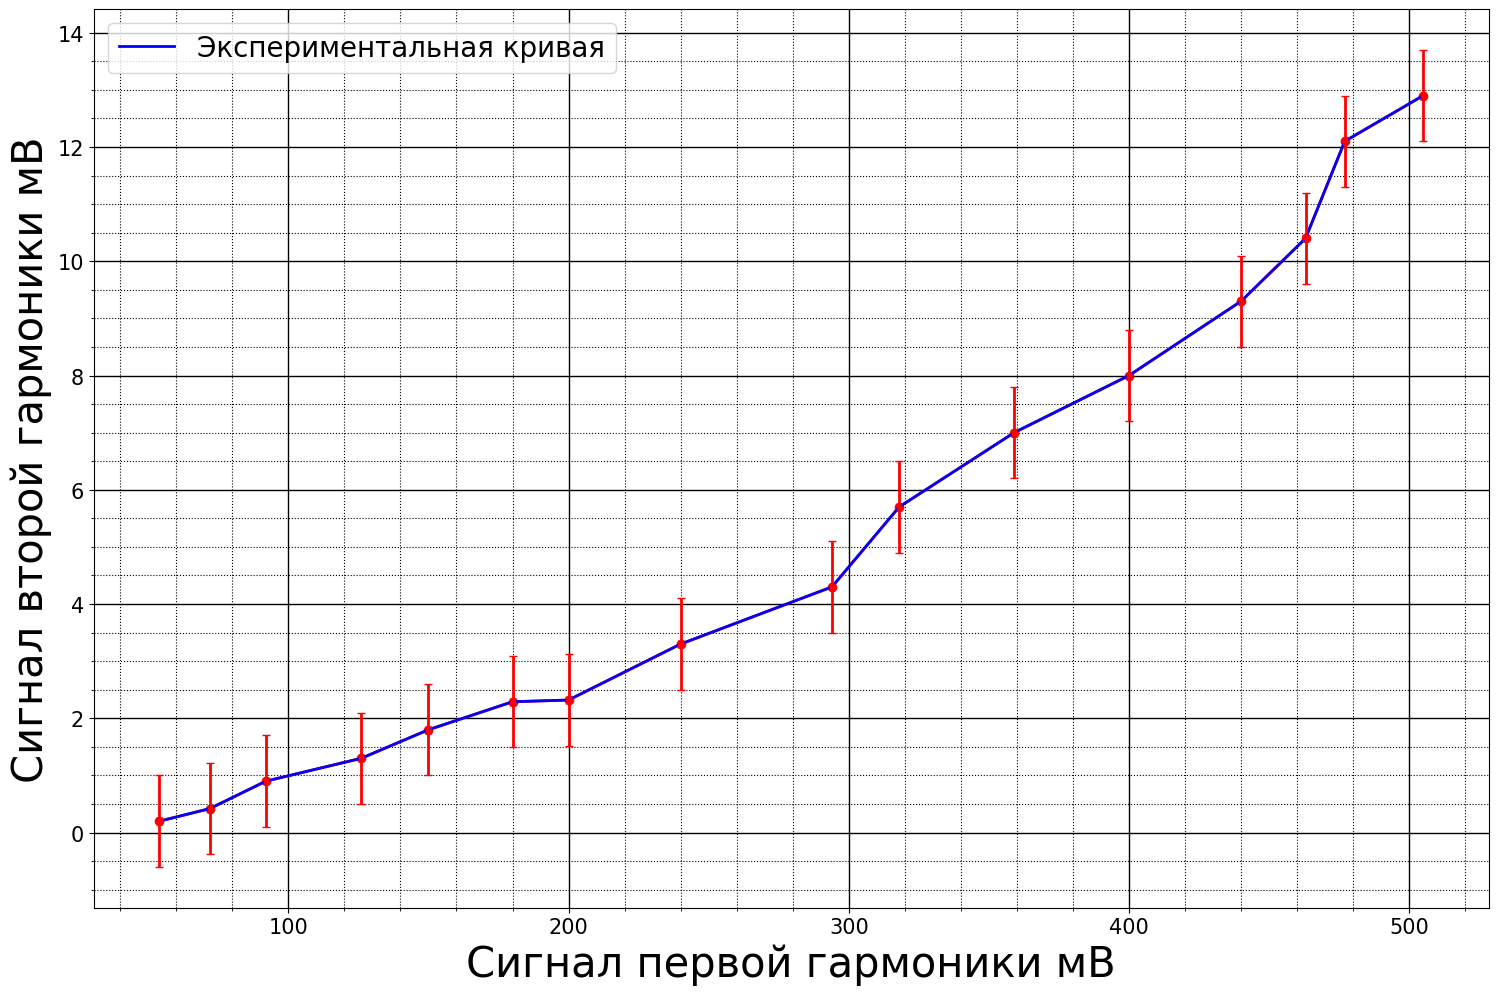

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(I_w,  I_2w, c = 'b',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Сигнал первой гармоники мВ',fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Cигнал второй гармоники мВ",fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.minorticks_on()
ax.errorbar(
            I_w, I_2w , xerr=error_I,  yerr=error_I,  
            c = 'r', ecolor = "r", 
            fmt='-o',barsabove=True,
            ms=6, capsize = 3,
            linewidth=width)

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

fig.savefig(os.path.join(sys.path[0]+'/plots', 'exp_curve_2har(1har).png'))

Из теории известно,  что при строгом синхронизме $I_{2\omega}\sim I_{\omega}^2$ Экспериментальная кривая хоть и напоминает параболу, однако скорее похожа на кривую, это может быть связано с тем, что мы достигли плохого фазового синхронизма